In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
loan_train_df = pd.read_csv("train.csv")

In [2]:
print (loan_train_df.shape)
print(loan_train_df.info())

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None


In [20]:
""""
Observations:
1.We can see there are total 13 columns including target variable, all of them are self explanatory.
"""

'"\nObservations:\n1.We can see there are total 13 columns including target variable, all of them are self explanatory.\n'

In [3]:
############ Count number of Categorical and Numerical Columns ######################
loan_train_df = loan_train_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


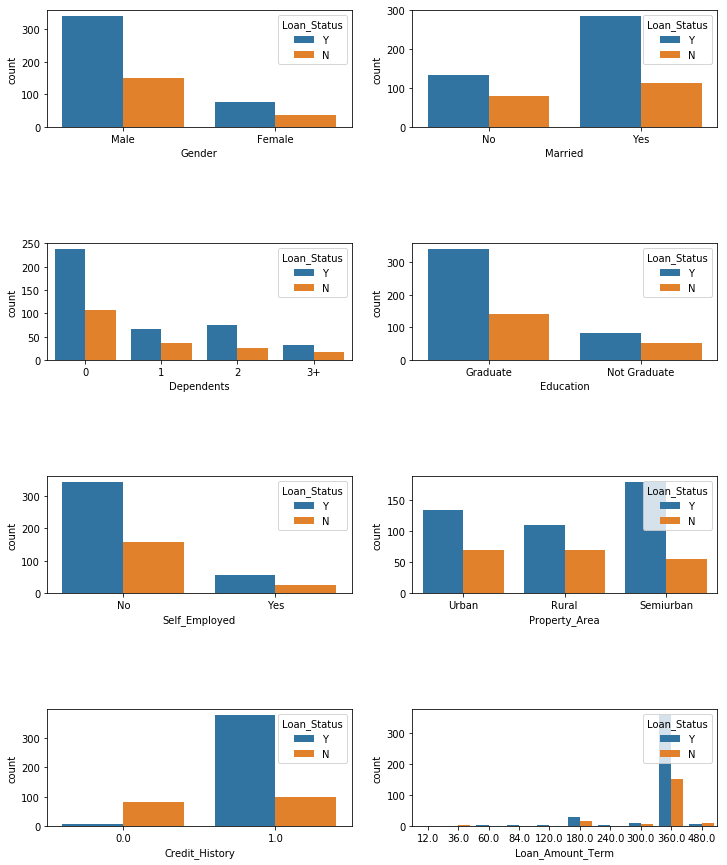

In [4]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [26]:
'''
***Plots above convey following things about the dataset:***
1.Loan Approval Status: About 2/3rd of applicants have been granted loan.
2.Sex: There are more Men than Women (approx. 3x).
3.Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4.Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5.Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6.Employment: 5/6th of population is not self employed.
7.Property Area: More applicants from Semi-urban and also likely to be granted loans.
8.Applicant with credit history are far more likely to be accepted.
9.Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).
'''

'\n***Plots above convey following things about the dataset:***\n1.Loan Approval Status: About 2/3rd of applicants have been granted loan.\n2.Sex: There are more Men than Women (approx. 3x).\n3.Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.\n4.Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.\n5.Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval\n6.Employment: 5/6th of population is not self employed.\n7.Property Area: More applicants from Semi-urban and also likely to be granted loans.\n8.Applicant with credit history are far more likely to be accepted.\n9.Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).\n'

In [ ]:
#Numerical Columns:

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


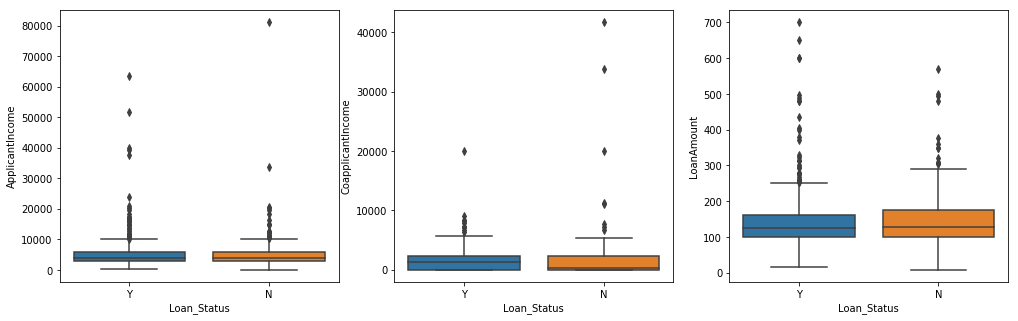

In [5]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=loan_train_df,x='Loan_Status',ax=axes[idx])

print(loan_train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [ ]:
#For Numercical Columns, there is no significant relation to Loan approval status.

In [30]:
#Preprocessing Data:
#Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

#1.Encoding Categorical Features.
#2.Imputing missing values

In [6]:
#### Encoding categrical Features: ##########
loan_train_df_encoded = pd.get_dummies(loan_train_df,drop_first=True)
loan_train_df_encoded.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
6,2333,1516.0,95.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
7,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0,0,1,0,0
8,4006,1526.0,168.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
9,12841,10968.0,349.0,360.0,1.0,1,1,1,0,0,0,0,1,0,0


In [8]:
########## Split Features and Target Varible ############
X = loan_train_df_encoded.drop(columns='Loan_Status_Y')
y = loan_train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
print(X_train)
imp = Imputer(strategy='mean')
imp_train = imp.fit(X_train)
print(imp_train)
X_train = imp_train.transform(X_train)
print(X_train)
X_test=imp_train.transform(X_test)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
154             3254                0.0        50.0             360.0   
239             3315                0.0        96.0             360.0   
448             3340             1710.0       150.0             360.0   
471             2653             1500.0       113.0             180.0   
273             2620             2223.0       150.0             360.0   
71              1875             1875.0        97.0             360.0   
590             3000             3416.0        56.0             180.0   
187             2383             2138.0        58.0             360.0   
404             7441                0.0       194.0             360.0   
159             4583             5625.0       255.0             360.0   
443            37719                0.0       152.0             360.0   
102            13650                0.0         NaN             360.0   
269             2876             1560.0        90.0

In [9]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
param_dict = {
    "criterion":['gini'],
    "max_depth":[3,4,5,6,7],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3,4,5]
}

In [11]:
grid = GridSearchCV(decision_tree,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)

In [12]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   10.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [13]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [14]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
y_test_predict=grid.predict(X_test)

In [16]:
cm= confusion_matrix(y_test, y_test_predict)
print(cm)

[[20 18]
 [ 1 84]]


In [17]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_test, y_pred=y_test_predict))

Accuracy Score on train data:  0.8455284552845529


In [ ]:
#2. Random Forest

In [18]:
rfc=RandomForestClassifier(random_state=42)

In [19]:
param_grid = { 
    'n_estimators': [50,60,70,80,90,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [20]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 60}

In [22]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 60, max_depth=4, criterion='gini')

In [23]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
y_test_predict=rfc1.predict(X_test)

In [25]:
cm= confusion_matrix(y_test, y_test_predict)
print(cm)

[[21 17]
 [ 1 84]]


In [26]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_test, y_pred=y_test_predict))

Accuracy Score on train data:  0.8536585365853658


In [ ]:
#3. Logistic Regression

In [28]:
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred=logreg.predict(X_test)

In [31]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[22, 16],
       [ 1, 84]], dtype=int64)

Text(0.5,257.44,'Predicted label')

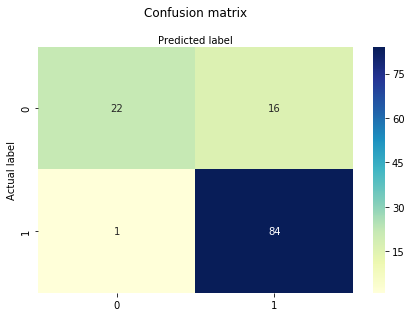

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8617886178861789
Precision: 0.84
Recall: 0.9882352941176471


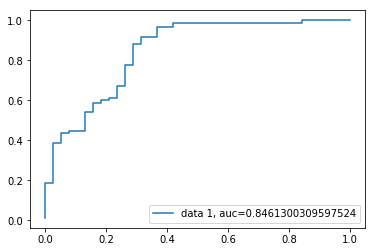

In [34]:
#ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()